In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv("C:\\Users\\rmith\\Downloads\\OULAD\\studentAssessment.csv")

In [16]:
df.head()
#df.describe

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [3]:
# Get the count of missing and null values
missing_values = df.isnull().sum()
print("\nMissing Values Count")
print(missing_values)


Missing Values Count
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64


In [4]:

unique_dates = df['date_submitted'].unique()
unique_sum_clicks = df['score'].unique()

# Display unique values
print("Unique values in 'date_submitted' column:")
print(unique_dates)

print("\nUnique values in 'score' column:")
print(unique_sum_clicks)

Unique values in 'date_submitted' column:
[ 18  22  17  26  19  20   9  21  16  30  32  10  25  15  54  24  33  27
  23  37  29   7  58  12  14  50  36  56  53  51  52  64  61  70 106  57
  59  48  62  55  68  69  67  63  49  47  75  60  95  65  90  66 116  42
  72  92 114 146 117 115 112 120 124 121 111 110 122  85 139 123 130 113
 118 135 127  78 134 108 126 107 119 131 138 125 100 102  94 133 128 164
 165 181 166 173 161 170 157 171 163 177 183 172 168 180 158 159 179 153
 175 169 176 174 152 156 150 162 167 178 187 188 160 215 213 212 219 214
 216 217 218 209 211 220 203 221 223 208 238 207 222 227 198 202 239 210
 204 201 194  -1  13  39   5  28  31  38  40  11  45  84  74  35  71  46
  44  93 109 132 144 129 137  79 136 185 184 155 237 224 234 205 235 226
  -4   6  41  -5  77  -3  43  91  34   8   1   3   4  -6  97  80  88  86
  81  76 186  83  89 104  87  99 101  96  98 103  82 105 193 141 142 145
 140 147 148 143 154 151 149 189 191 197 182 192 195 199 190 206 200 196
   0   2 

In [27]:
df.dropna(subset=['score'], inplace=True)

In [28]:
# Get the count of missing and null values
missing_values = df.isnull().sum()
print("\nMissing Values Count")
print(missing_values)


Missing Values Count
id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64


Descriptive Statistics for 'score':
count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64


C:\Users\rmith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


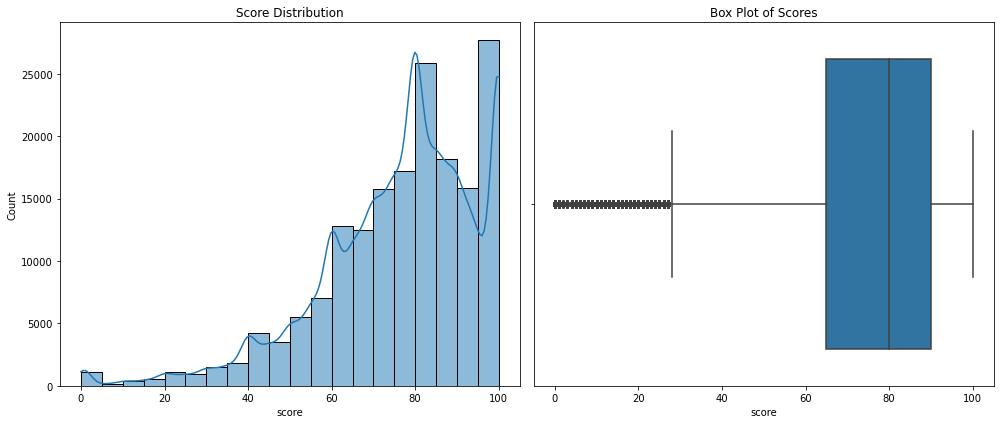

Descriptive Statistics for 'date_submitted':
count    173739.000000
mean        116.020226
std          71.479612
min         -11.000000
25%          51.000000
50%         116.000000
75%         173.000000
max         608.000000
Name: date_submitted, dtype: float64


C:\Users\rmith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


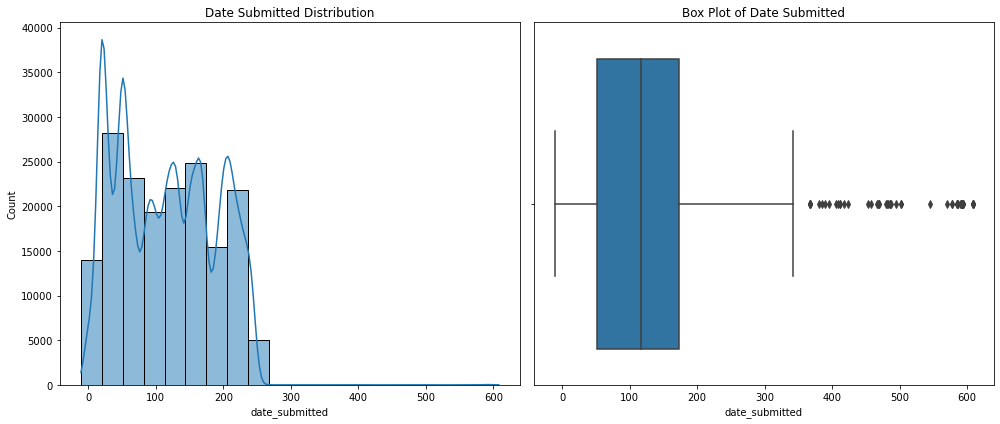

Correlation between 'score' and 'date_submitted': -0.03389304268778609


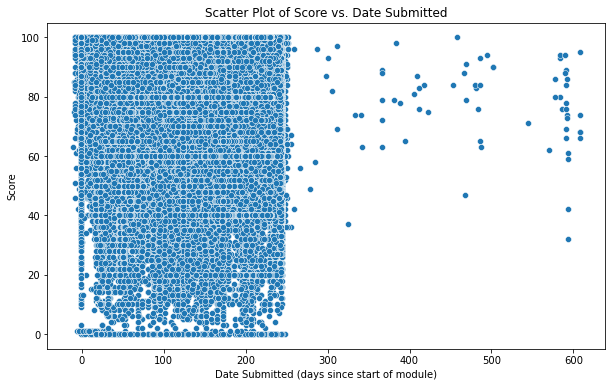

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Analysis of 'score' column
score_desc = df['score'].describe()
print("Descriptive Statistics for 'score':")
print(score_desc)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Score Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(df['score'])
plt.title('Box Plot of Scores')

plt.tight_layout()
plt.show()

# Analysis of 'date_submitted' column
date_submitted_desc = df['date_submitted'].describe()
print("Descriptive Statistics for 'date_submitted':")
print(date_submitted_desc)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['date_submitted'], bins=20, kde=True)
plt.title('Date Submitted Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(df['date_submitted'])
plt.title('Box Plot of Date Submitted')

plt.tight_layout()
plt.show()

# Analysis of the relationship between 'score' and 'date_submitted'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='date_submitted', y='score', data=df)
plt.title('Scatter Plot of Score vs. Date Submitted')
plt.xlabel('Date Submitted (days since start of module)')
plt.ylabel('Score')

# Correlation analysis
correlation = df['score'].corr(df['date_submitted'])
print(f"Correlation between 'score' and 'date_submitted': {correlation}")

plt.show()

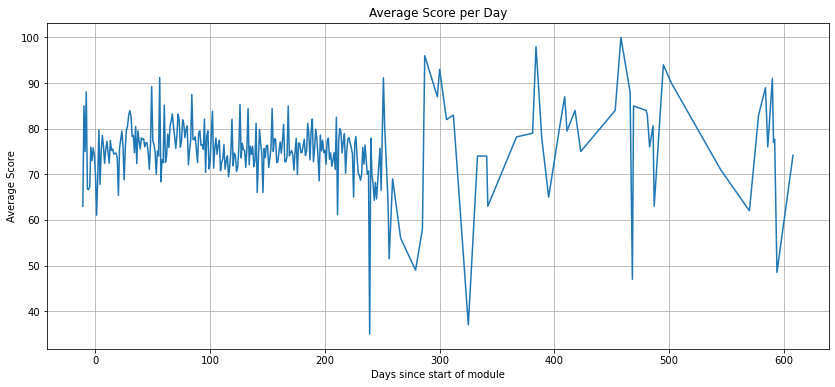

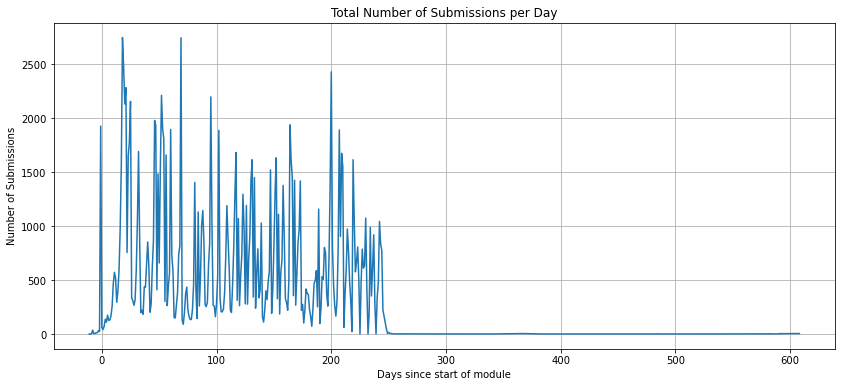

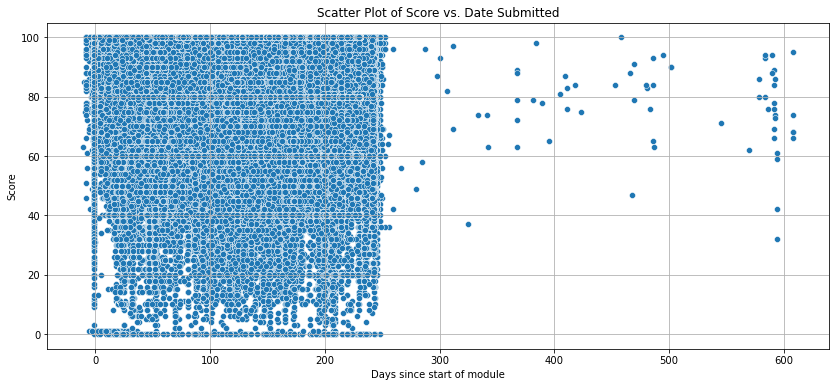

Correlation between 'score' and 'date_submitted': -0.03389304268778609


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average score per day
avg_score_per_day = df.groupby('date_submitted')['score'].mean()

# Calculate total number of submissions per day
submissions_per_day = df.groupby('date_submitted').size()

# Plot average score per day
plt.figure(figsize=(14, 6))
sns.lineplot(x=avg_score_per_day.index, y=avg_score_per_day.values)
plt.title('Average Score per Day')
plt.xlabel('Days since start of module')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

# Plot total number of submissions per day
plt.figure(figsize=(14, 6))
sns.lineplot(x=submissions_per_day.index, y=submissions_per_day.values)
plt.title('Total Number of Submissions per Day')
plt.xlabel('Days since start of module')
plt.ylabel('Number of Submissions')
plt.grid(True)
plt.show()

# Time Series Analysis
plt.figure(figsize=(14, 6))
sns.scatterplot(x='date_submitted', y='score', data=df)
plt.title('Scatter Plot of Score vs. Date Submitted')
plt.xlabel('Days since start of module')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Correlation analysis
correlation = df['score'].corr(df['date_submitted'])
print(f"Correlation between 'score' and 'date_submitted': {correlation}")


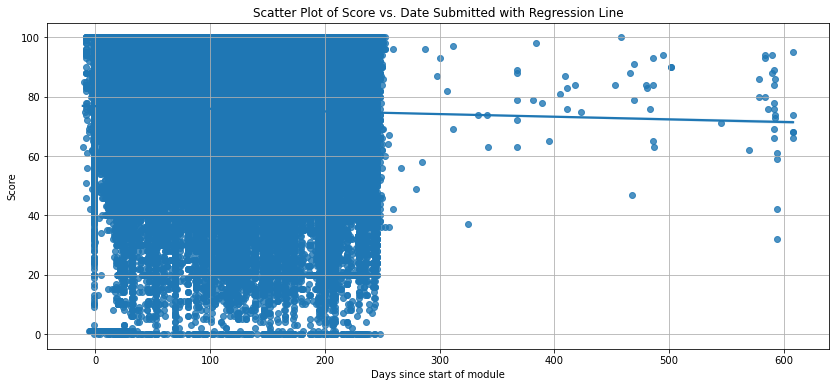

Correlation between 'score' and 'date_submitted': -0.03389304268778609


In [32]:
# Scatter Plot with Regression Line
plt.figure(figsize=(14, 6))
sns.regplot(x='date_submitted', y='score', data=df)
plt.title('Scatter Plot of Score vs. Date Submitted with Regression Line')
plt.xlabel('Days since start of module')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Correlation analysis
correlation = df['score'].corr(df['date_submitted'])
print(f"Correlation between 'score' and 'date_submitted': {correlation}")

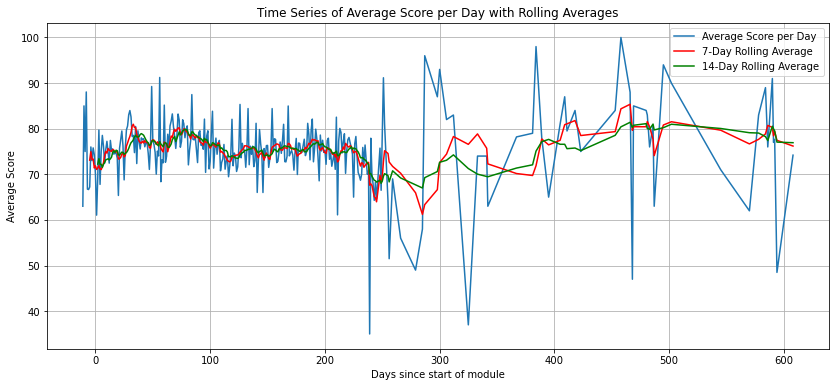

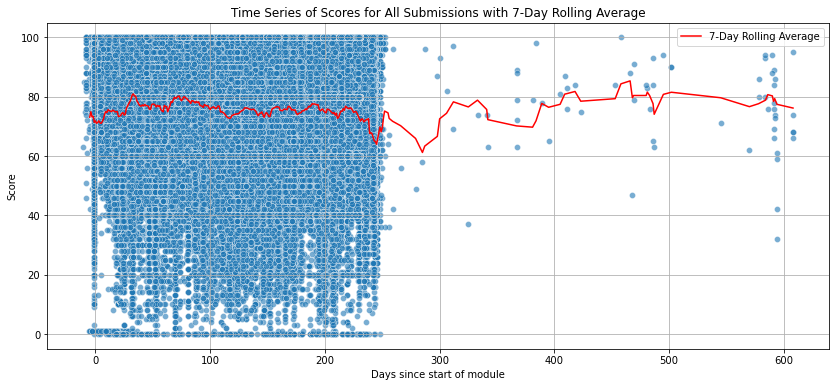

In [33]:
# Calculate rolling average (7-day window)
rolling_avg_7 = avg_score_per_day.rolling(window=7).mean()
# Calculate rolling average (14-day window)
rolling_avg_14 = avg_score_per_day.rolling(window=14).mean()

# Plot time series of average score per day with rolling averages
plt.figure(figsize=(14, 6))
sns.lineplot(x=avg_score_per_day.index, y=avg_score_per_day.values, label='Average Score per Day')
sns.lineplot(x=rolling_avg_7.index, y=rolling_avg_7.values, label='7-Day Rolling Average', color='red')
sns.lineplot(x=rolling_avg_14.index, y=rolling_avg_14.values, label='14-Day Rolling Average', color='green')
plt.title('Time Series of Average Score per Day with Rolling Averages')
plt.xlabel('Days since start of module')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.show()

# Plot time series of scores for all submissions with rolling average (7-day window)
plt.figure(figsize=(14, 6))
sns.scatterplot(x='date_submitted', y='score', data=df, alpha=0.6)
sns.lineplot(x=rolling_avg_7.index, y=rolling_avg_7.values, label='7-Day Rolling Average', color='red')
plt.title('Time Series of Scores for All Submissions with 7-Day Rolling Average')
plt.xlabel('Days since start of module')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

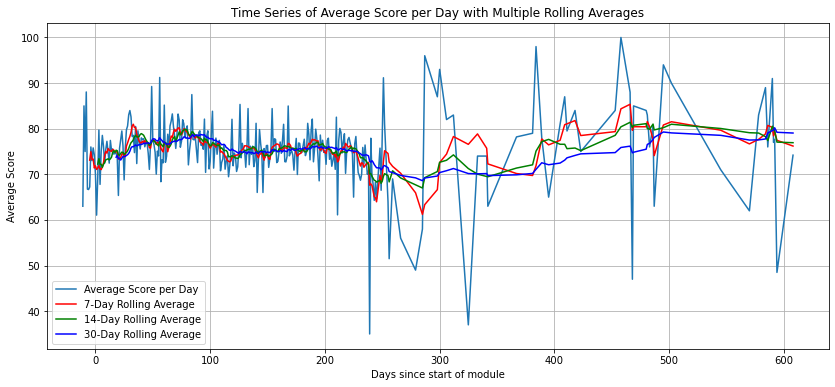

In [34]:
# Calculate rolling averages
rolling_avg_7 = avg_score_per_day.rolling(window=7).mean()
rolling_avg_14 = avg_score_per_day.rolling(window=14).mean()
rolling_avg_30 = avg_score_per_day.rolling(window=30).mean()

# Plot time series of average score per day with multiple rolling averages
plt.figure(figsize=(14, 6))
sns.lineplot(x=avg_score_per_day.index, y=avg_score_per_day.values, label='Average Score per Day')
sns.lineplot(x=rolling_avg_7.index, y=rolling_avg_7.values, label='7-Day Rolling Average', color='red')
sns.lineplot(x=rolling_avg_14.index, y=rolling_avg_14.values, label='14-Day Rolling Average', color='green')
sns.lineplot(x=rolling_avg_30.index, y=rolling_avg_30.values, label='30-Day Rolling Average', color='blue')
plt.title('Time Series of Average Score per Day with Multiple Rolling Averages')
plt.xlabel('Days since start of module')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.show()

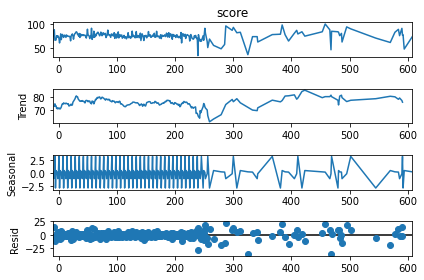

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(avg_score_per_day, model='additive', period=7)
result.plot()
plt.show()

Mean Squared Error: 349.52728036322674


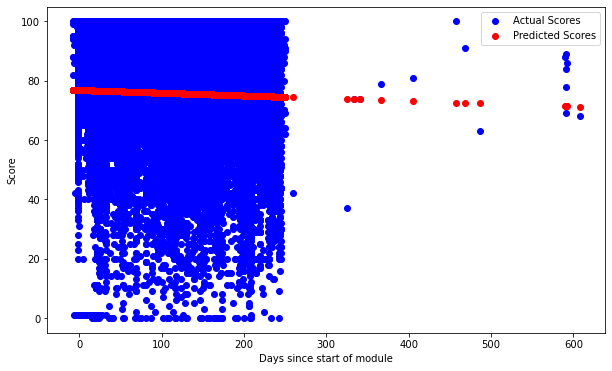

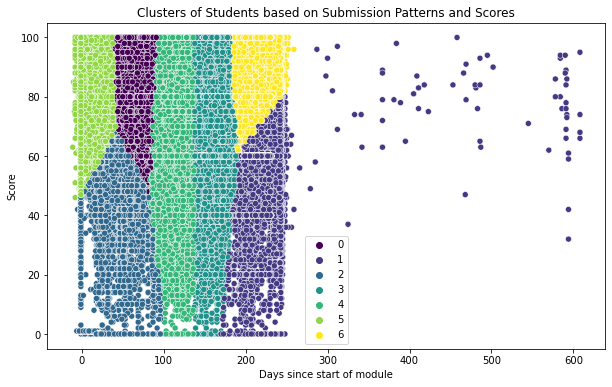

In [41]:
from sklearn.cluster import KMeans

# Cluster the students based on their submission dates and scores
kmeans = KMeans(n_clusters=7)
df['cluster'] = kmeans.fit_predict(df[['date_submitted', 'score']])

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='date_submitted', y='score', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Students based on Submission Patterns and Scores')
plt.xlabel('Days since start of module')
plt.ylabel('Score')
plt.legend()
plt.show()


C:\Users\rmith\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


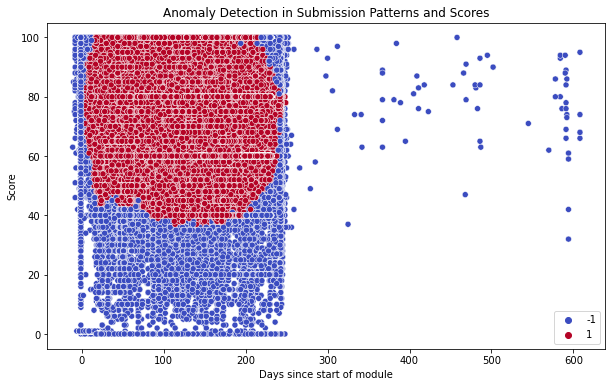

In [42]:
from sklearn.ensemble import IsolationForest

# Use Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.1)
df['anomaly'] = iso_forest.fit_predict(df[['date_submitted', 'score']])

# Plot the anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='date_submitted', y='score', hue='anomaly', data=df, palette='coolwarm')
plt.title('Anomaly Detection in Submission Patterns and Scores')
plt.xlabel('Days since start of module')
plt.ylabel('Score')
plt.legend()
plt.show()


In [43]:
from statsmodels.tsa.stattools import grangercausalitytests

# Granger causality test to see if date_submitted can predict score
max_lag = 10
test_result = grangercausalitytests(df[['score', 'date_submitted']], max_lag)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4533  , p=0.0631  , df_denom=173735, df_num=1
ssr based chi2 test:   chi2=3.4534  , p=0.0631  , df=1
likelihood ratio test: chi2=3.4533  , p=0.0631  , df=1
parameter F test:         F=3.4533  , p=0.0631  , df_denom=173735, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5065  , p=0.2217  , df_denom=173732, df_num=2
ssr based chi2 test:   chi2=3.0130  , p=0.2217  , df=2
likelihood ratio test: chi2=3.0130  , p=0.2217  , df=2
parameter F test:         F=1.5065  , p=0.2217  , df_denom=173732, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1448  , p=0.3294  , df_denom=173729, df_num=3
ssr based chi2 test:   chi2=3.4345  , p=0.3294  , df=3
likelihood ratio test: chi2=3.4345  , p=0.3294  , df=3
parameter F test:         F=1.1448  , p=0.3294  , df_denom=173729, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.

In [47]:
!pip install lifelines


  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=bb5f578646832b7c7097b6e506c49dff9fd4ef3124fc1ca8936517db13e4256f
  Stored in directory: c:\users\rmith\appdata\local\pip\cache\wheels\a8\03\64\8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.


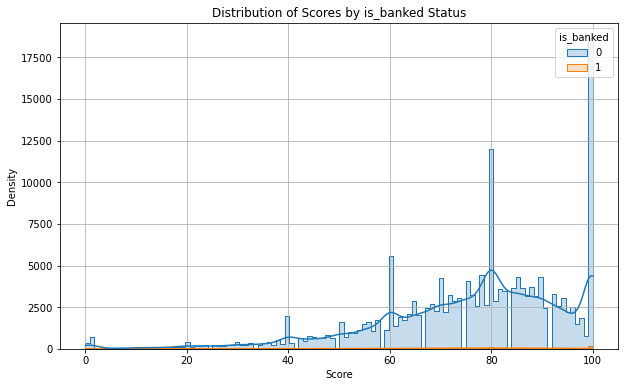

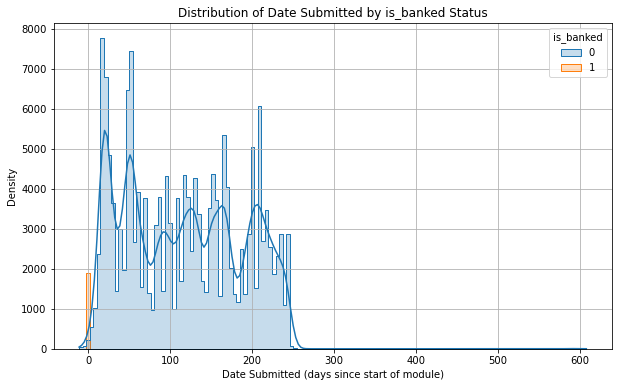

In [62]:
# Distribution plot for score by is_banked status
plt.figure(figsize=(10, 6))
sns.histplot(df, x='score', hue='is_banked', kde=True, element='step')
plt.title('Distribution of Scores by is_banked Status')
plt.xlabel('Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Distribution plot for date_submitted by is_banked status
plt.figure(figsize=(10, 6))
sns.histplot(df, x='date_submitted', hue='is_banked', kde=True, element='step')
plt.title('Distribution of Date Submitted by is_banked Status')
plt.xlabel('Date Submitted (days since start of module)')
plt.ylabel('Density')
plt.grid(True)
plt.show()